# 本篇為二次優化查看頻道的各個影片資訊

## 同樣需要先導入package及設定需要的變數

In [1]:
from googleapiclient.discovery import build
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
api_service_name = "youtube"
api_version = "v3"
api_key = '你的金鑰'
youtube = build('youtube', 'v3', developerKey = api_key)

## 匯入上一支程式所匯出的excel

In [3]:
channel_data = pd.read_excel('music_channel.xlsx', index_col=0)
channel_data

,Channel_name,Description,Published,Country,Subscribers,Views,Playlist,VideoCount,Channel_topic,Image,Keywords
0,Ayase / YOASOBI,ボカロP・Ayase、そしてAyaseがコンポーザーを務めるユニット・YOASOBIのYou...,2018-11-16,JP,3980000,2016671458,UUvpredjG93ifbCP1Y77JyFA,110,"['Music', 'Music_of_Asia', 'Pop_music']",https://yt3.ggpht.com/ytc/AMLnZu_8o8D8yLIaOLRZ...,NaN
1,Ado,元気です。,2018-08-18,JP,3960000,1369159002,UUln9P4Qm3-EAY4aiEPmRwEA,80,"['Independent_music', 'Music_of_Asia', 'Music'...",https://yt3.ggpht.com/I3ckNVLPQq04aQklOnRctTEn...,"アド あぼ ado ""アド 歌い手"" ADO Ado ""Ado TikTok"" ""アド ティ..."
2,Pan Piano,台湾のピアニストです！ \nアニソンを弾いてます～ \n良かったら、チャンネル登録お願いしま...,2016-07-27,TW,3350000,521228927,UUI7ktPB6toqucpkkCiolwLg,543,"['Music', 'Music_of_Asia', 'Classical_music']",https://yt3.ggpht.com/ytc/AMLnZu-uZODxdm-BCEo0...,鋼琴 演奏 ACG 動畫 漫畫 piano ピアノ アニメ 弾いてみた コスプレ パンピアノ...
3,kobasolo,毎週金曜19時更新!!音楽プロデューサー、ミュージシャンとして活動するコバソロが贈るエンター...,2008-06-30,JP,3000000,1417515169,UUDbQblY1XASbgqOXmy6FOFQ,499,"['Music', 'Music_of_Asia', 'Pop_music']",https://yt3.ggpht.com/ytc/AMLnZu-9S3og5Ip2zFAS...,KOBASOLO コバソロ リトルタートルズ 音楽 music インディーズ little ...
4,美波,【美波 Official Youtube Channel】,2016-01-03,JP,1300000,409945880,UU2JzylaIF8qeowc7-5VwwmA,7,"['Rock_music', 'Independent_music', 'Music', '...",https://yt3.ggpht.com/ytc/AMLnZu-a_zfDCmdvUihG...,シンガーソングライター
5,星野源,音楽家・俳優・文筆家。\n2010年に1stアルバム『ばかのうた』にてソロデビュー。2016...,2015-05-08,JP,1460000,919716553,UUPKlrgZXnnb89nSeITvTdGA,96,"['Music', 'Music_of_Asia', 'Pop_music']",https://yt3.ggpht.com/DLCVX6ArRGaHMe4k4N7Q_QtY...,"星野源 ほしのげん ホシノゲン ""Gen Hoshino"" ""Hoshino Gen"" ""星..."
6,2CELLOS,The official home of 2CELLOS - we post our new...,2011-10-17,HR,6270000,1609923110,UUyjuFsbclXyntSRMBAILzbw,213,"['Independent_music', 'Classical_music', 'Musi...",https://yt3.ggpht.com/ytc/AMLnZu9V7gXnpIUCJYKK...,2CELLOS Luka Sulic Stjepan Hauser Two Cellos
7,Ru's Piano Ru味春捲,"I’m RuRu, a piano youtuber from Taiwan.\nMakin...",2018-03-14,TW,2260000,291322016,UUAYrMNl92jw6cpjdpBP8JyA,395,"['Music', 'Music_of_Asia', 'Classical_music']",https://yt3.ggpht.com/ytc/AMLnZu_-ZUJbCF-LRu25...,"鋼琴 Ru味春捲 ""Ru's Piano"" ""Ru Piano"" Piano ピアノ ""An..."
8,THE FIRST TAKE,A microphone and a white studio.\n\nAnd 1 rule...,2019-11-05,JP,6720000,2362062682,UU9zY_E8mcAo_Oq772LEZq8Q,420,"['Music', 'Music_of_Asia', 'Pop_music']",https://yt3.ggpht.com/ytc/AMLnZu9H0hC1Gt8ZLT4V...,NaN


## 需要使用頻道的id才可取得頻道裡面，各個影片的 id
取得影片資訊：https://developers.google.com/youtube/v3/docs/playlistItems/list

In [4]:
df_ids = channel_data[['Channel_name', 'Playlist', 'VideoCount']]
df_ids

,Channel_name,Playlist,VideoCount
0,Ayase / YOASOBI,UUvpredjG93ifbCP1Y77JyFA,110
1,Ado,UUln9P4Qm3-EAY4aiEPmRwEA,80
2,Pan Piano,UUI7ktPB6toqucpkkCiolwLg,543
3,kobasolo,UUDbQblY1XASbgqOXmy6FOFQ,499
4,美波,UU2JzylaIF8qeowc7-5VwwmA,7
5,星野源,UUPKlrgZXnnb89nSeITvTdGA,96
6,2CELLOS,UUyjuFsbclXyntSRMBAILzbw,213
7,Ru's Piano Ru味春捲,UUAYrMNl92jw6cpjdpBP8JyA,395
8,THE FIRST TAKE,UU9zY_E8mcAo_Oq772LEZq8Q,420


## 需要先透過"頻道"的id，取得各個"影片"的id
影片一次最多只能取得50筆(一頁50部影片)，故api有提供nextPagetoken這個變數，若此變數為True，我們就能取得其他頁數的影片id

In [5]:
def get_video_ids(youtube, playlist_id):
    
    request = youtube.playlistItems().list(
              part = 'contentDetails',
              playlistId = playlist_id,
              maxResults = 50) # 50 is max
    response = request.execute()
    
    video_ids = []
    for i in range(len(response['items'])):
        video_ids.append(response['items'][i]['contentDetails']['videoId'])
        
    next_page_token = response.get('nextPageToken')
    more_pages = True
    
    while more_pages: 
        if next_page_token is None:
            more_pages = False
        else: # json存在nextPageToken，透過以下取得50以上的videos
            request = youtube.playlistItems().list(
                    part = 'contentDetails',
                    playlistId = playlist_id,
                    pageToken = next_page_token)
            response = request.execute()
            for i in range(len(response['items'])):
                video_ids.append(response['items'][i]['contentDetails']['videoId'])
            next_page_token = response.get('nextPageToken')
    print('影片數量:', len(video_ids))
    return video_ids

In [6]:
playlist_id01 = channel_data.loc[channel_data['Channel_name'] == '2CELLOS', 'Playlist'].iloc[0]
playlist_id02 = channel_data.loc[channel_data['Channel_name'] == '美波', 'Playlist'].iloc[0]
playlist_id03 = channel_data.loc[channel_data['Channel_name'] == 'Ado', 'Playlist'].iloc[0]
playlist_id04 = channel_data.loc[channel_data['Channel_name'] == 'Ayase / YOASOBI', 'Playlist'].iloc[0]
playlist_id05 = channel_data.loc[channel_data['Channel_name'] == '星野源', 'Playlist'].iloc[0]
playlist_id06 = channel_data.loc[channel_data['Channel_name'] == 'kobasolo', 'Playlist'].iloc[0]
playlist_id07 = channel_data.loc[channel_data['Channel_name'] == "Ru's Piano Ru味春捲", 'Playlist'].iloc[0]
playlist_id08 = channel_data.loc[channel_data['Channel_name'] == 'Pan Piano', 'Playlist'].iloc[0]
playlist_id09 = channel_data.loc[channel_data['Channel_name'] == 'THE FIRST TAKE', 'Playlist'].iloc[0]

In [7]:
video_ids01 = get_video_ids(youtube, playlist_id01)
video_ids02 = get_video_ids(youtube, playlist_id02)
video_ids03 = get_video_ids(youtube, playlist_id03)
video_ids04 = get_video_ids(youtube, playlist_id04)
video_ids05 = get_video_ids(youtube, playlist_id05)
video_ids06 = get_video_ids(youtube, playlist_id06)
video_ids07 = get_video_ids(youtube, playlist_id07)
video_ids08 = get_video_ids(youtube, playlist_id08)
video_ids09 = get_video_ids(youtube, playlist_id09)

影片數量: 214
影片數量: 7
影片數量: 80
影片數量: 111
影片數量: 96
影片數量: 500
影片數量: 395
影片數量: 544
影片數量: 420


## 可透過以下測試查看"影片"的欄位資料

In [16]:
# def test_channel_video_detail(youtube, video_ids):
#     for i in range(0, len(video_ids), 50):
#         request = youtube.videos().list(
#         part = 'snippet, statistics,topicDetails, status, player, liveStreamingDetails',
#         id=','.join(video_ids[i:i+50]))
#     response = request.execute()
    
#     return response

In [22]:
# test_channel_video_detail(youtube, video_ids)

## 查看過後抓取特定欄位並轉成將其轉為dictionary

In [8]:
def get_channel_video_detail(youtube, video_ids):
    
    all_video_stats = []
    for i in range(0, len(video_ids), 50):
        request = youtube.videos().list(
        part = 'snippet, statistics, topicDetails',
        id=','.join(video_ids[i:i+50]))
        response = request.execute()
        for video in response['items']:
            video_stats = dict(Title = video['snippet']['title'],
                               Description = video['snippet']['description'],
                               PublishedAt = video['snippet']['publishedAt'],
                               Language = '',
                               Views = video['statistics']['viewCount'],
                               Likes = video['statistics']['likeCount'],
                               CommentCount = '',
                               Image = video['snippet']['thumbnails']['high']['url'],
                               Tags = '',
                               Topic = '')
            if 'tags' in video['snippet']:video_stats['Tags'] = video['snippet']['tags']
            if 'topicDetails' in video:video_stats['Topic'] = video['topicDetails']['topicCategories']
            if 'defaultAudioLanguage' in video['snippet']:video_stats['Language'] = video['snippet']['defaultAudioLanguage']
            if 'commentCount' in video['statistics']:video_stats['CommentCount'] = video['statistics']['commentCount']
            all_video_stats.append(video_stats)
    return all_video_stats

In [9]:
video_details01 = get_channel_video_detail(youtube, video_ids01)
video_details02 = get_channel_video_detail(youtube, video_ids02)
video_details03 = get_channel_video_detail(youtube, video_ids03)
video_details04 = get_channel_video_detail(youtube, video_ids04)
video_details05 = get_channel_video_detail(youtube, video_ids05)
video_details06 = get_channel_video_detail(youtube, video_ids06)
video_details07 = get_channel_video_detail(youtube, video_ids07)
video_details08 = get_channel_video_detail(youtube, video_ids08)
video_details09 = get_channel_video_detail(youtube, video_ids09)

## 取得過後同樣將其轉為DataFrame以方便查看

In [43]:
data_2CELLOS = pd.DataFrame(video_details01)
data_minami = pd.DataFrame(video_details02)
data_ado = pd.DataFrame(video_details03)
data_YOASOBI = pd.DataFrame(video_details04)
data_hoshinogen = pd.DataFrame(video_details05)
data_kobasolo = pd.DataFrame(video_details06)
data_rurupaino = pd.DataFrame(video_details07)
data_panpaino = pd.DataFrame(video_details08)
data_thefirsttake = pd.DataFrame(video_details09)

## 同樣針對部分資料做整理，包含主題、資料型態等

In [44]:
def get_topic(df):
    col = []
    topic = []
    for i in df['Topic']:
        if i == '':
            col.append('')
        else:
            for j in range(len(i)):
                topic.append(i[j].split('/')[4])
            col.append(topic)
            topic = []
    df['Topic'] = col
    return df.head()

In [45]:
get_topic(data_2CELLOS) # 6
get_topic(data_minami)# 5
get_topic(data_ado) # 6
get_topic(data_YOASOBI) # 5
get_topic(data_hoshinogen)
get_topic(data_kobasolo) # 5
get_topic(data_rurupaino) # 4
get_topic(data_panpaino)# 5
get_topic(data_thefirsttake)# 6

,Title,Description,PublishedAt,Language,Views,Likes,CommentCount,Image,Tags,Topic
0,森七菜 - スマイル / THE FIRST TAKE,「THE FIRST TAKE」は、一発撮りのパフォーマンスを鮮明に切り取るYouTubeチ...,2022-09-09T13:00:13Z,ja,1106317,46333,1669,https://i.ytimg.com/vi/lNDkODRoLvI/hqdefault.jpg,"[the first take, first take, ファーストテイク, ファステク, ...","[Music, Music_of_Asia, Pop_music]"
1,Kep1er - Wing Wing / THE FIRST TAKE,「THE FIRST TAKE」は、一発撮りのパフォーマンスを鮮明に切り取るYouTubeチ...,2022-09-07T13:00:14Z,ja,1596473,80218,2700,https://i.ytimg.com/vi/NJd0-O-IkPY/hqdefault.jpg,"[the first take, first take, ファーストテイク, Tokyo s...","[Music, Music_of_Asia, Pop_music]"
2,Kep1er - WA DA DA (Japanese ver.) / THE FIRST ...,第239回は、9人組グローバルガールズグループ・Kep1erが初登場。\n披露するのは全世界...,2022-09-06T06:36:42Z,ja,563213,17247,124,https://i.ytimg.com/vi/ZeMsSO6hpms/hqdefault.jpg,,"[Music, Music_of_Asia, Pop_music]"
3,Avril Lavigne - Complicated / THE FIRST TAKE,THE FIRST TAKE is a YouTube Channel dedicated ...,2022-09-02T13:00:14Z,en,5183532,229049,8438,https://i.ytimg.com/vi/_P9zR5KaPsc/hqdefault.jpg,"[the first take, first take, ファーストテイク, ファステク, ...","[Country_music, Music, Pop_music, Rock_music]"
4,Creepy Nuts - 堕天 / THE FIRST TAKE,第238回は、”日本三連覇のラッパー”R-指定と、”世界一のDJ”DJ松永による1MC1DJ...,2022-08-31T15:00:38Z,ja,354419,12138,110,https://i.ytimg.com/vi/q2jz1O4GLWQ/hqdefault.jpg,,"[Hip_hop_music, Music]"


In [46]:
data_2CELLOS[['Topic1', 'Topic2', 'Topic3', 'Topic4', 'Topic5', 'Topic6']] = pd.DataFrame(data_2CELLOS['Topic'].tolist())
data_minami[['Topic1', 'Topic2', 'Topic3', 'Topic4', 'Topic5']] = pd.DataFrame(data_minami['Topic'].tolist())
data_ado[['Topic1', 'Topic2', 'Topic3', 'Topic4', 'Topic5', 'Topic6']] = pd.DataFrame(data_ado['Topic'].tolist())
data_YOASOBI[['Topic1', 'Topic2', 'Topic3', 'Topic4', 'Topic5']] = pd.DataFrame(data_YOASOBI['Topic'].tolist())
data_kobasolo[['Topic1', 'Topic2', 'Topic3', 'Topic4', 'Topic5']] = pd.DataFrame(data_kobasolo['Topic'].tolist())
data_rurupaino[['Topic1', 'Topic2', 'Topic3', 'Topic4']] = pd.DataFrame(data_rurupaino['Topic'].tolist())
data_panpaino[['Topic1', 'Topic2', 'Topic3', 'Topic4', 'Topic5']] = pd.DataFrame(data_panpaino['Topic'].tolist())
data_thefirsttake[['Topic1', 'Topic2', 'Topic3', 'Topic4', 'Topic5', 'Topic6']] = pd.DataFrame(data_thefirsttake['Topic'].tolist())

In [47]:
def get_top_five_tags(df):
    for col in range(len(df)):
        if df['Tags'][col] != '':
            df['Tags'][col] = df['Tags'][col][:5]
        else:
            df['Tags'][col] = [['','','','','']]
    return df

In [48]:
get_top_five_tags(data_2CELLOS)
get_top_five_tags(data_minami)
get_top_five_tags(data_ado)
get_top_five_tags(data_YOASOBI)
get_top_five_tags(data_hoshinogen)
get_top_five_tags(data_kobasolo)
get_top_five_tags(data_rurupaino)
get_top_five_tags(data_panpaino)
get_top_five_tags(data_thefirsttake)

,Title,Description,PublishedAt,Language,Views,Likes,CommentCount,Image,Tags,Topic,Topic1,Topic2,Topic3,Topic4,Topic5,Topic6
0,森七菜 - スマイル / THE FIRST TAKE,「THE FIRST TAKE」は、一発撮りのパフォーマンスを鮮明に切り取るYouTubeチ...,2022-09-09T13:00:13Z,ja,1106317,46333,1669,https://i.ytimg.com/vi/lNDkODRoLvI/hqdefault.jpg,"[the first take, first take, ファーストテイク, ファステク, ...","[Music, Music_of_Asia, Pop_music]",Music,Music_of_Asia,Pop_music,None,None,None
1,Kep1er - Wing Wing / THE FIRST TAKE,「THE FIRST TAKE」は、一発撮りのパフォーマンスを鮮明に切り取るYouTubeチ...,2022-09-07T13:00:14Z,ja,1596473,80218,2700,https://i.ytimg.com/vi/NJd0-O-IkPY/hqdefault.jpg,"[the first take, first take, ファーストテイク, Tokyo s...","[Music, Music_of_Asia, Pop_music]",Music,Music_of_Asia,Pop_music,None,None,None
2,Kep1er - WA DA DA (Japanese ver.) / THE FIRST ...,第239回は、9人組グローバルガールズグループ・Kep1erが初登場。\n披露するのは全世界...,2022-09-06T06:36:42Z,ja,563213,17247,124,https://i.ytimg.com/vi/ZeMsSO6hpms/hqdefault.jpg,"[[, , , , ]]","[Music, Music_of_Asia, Pop_music]",Music,Music_of_Asia,Pop_music,None,None,None
3,Avril Lavigne - Complicated / THE FIRST TAKE,THE FIRST TAKE is a YouTube Channel dedicated ...,2022-09-02T13:00:14Z,en,5183532,229049,8438,https://i.ytimg.com/vi/_P9zR5KaPsc/hqdefault.jpg,"[the first take, first take, ファーストテイク, ファステク, ...","[Country_music, Music, Pop_music, Rock_music]",Country_music,Music,Pop_music,Rock_music,None,None
4,Creepy Nuts - 堕天 / THE FIRST TAKE,第238回は、”日本三連覇のラッパー”R-指定と、”世界一のDJ”DJ松永による1MC1DJ...,2022-08-31T15:00:38Z,ja,354419,12138,110,https://i.ytimg.com/vi/q2jz1O4GLWQ/hqdefault.jpg,"[[, , , , ]]","[Hip_hop_music, Music]",Hip_hop_music,Music,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
415,LiSA - 紅蓮華 / THE FIRST TAKE,「THE FIRST TAKE」は、アーティストの一発撮りのパフォーマンスをよりリアルに、鮮...,2019-12-06T13:00:10Z,ja,125393123,1345499,45489,https://i.ytimg.com/vi/MpYy6wwqxoo/hqdefault.jpg,"[the first take, first take, ファーストテイク, ファステク, ...","[Music, Music_of_Asia, Rock_music]",Music,Music_of_Asia,Rock_music,None,None,None
416,adieu - 天気 / THE FIRST TAKE,「THE FIRST TAKE」は、アーティストの一発撮りのパフォーマンスをよりリアルに、鮮...,2019-12-04T13:00:13Z,ja,1277183,13791,372,https://i.ytimg.com/vi/FT6Wf8EWYwA/hqdefault.jpg,"[the first take, first take, ファーストテイク, ファステク, ...","[Music, Music_of_Asia, Pop_music]",Music,Music_of_Asia,Pop_music,None,None,None
417,Cö shu Nie - asphyxia （piano ver.) / THE FIRST...,「THE FIRST TAKE」は、アーティストの一発撮りのパフォーマンスをよりリアルに、鮮...,2019-11-29T13:00:12Z,ja,5936425,164170,3680,https://i.ytimg.com/vi/eWPYxw_yqW4/hqdefault.jpg,"[the first take, first take, ファーストテイク, ファステク, ...","[Music, Music_of_Asia]",Music,Music_of_Asia,None,None,None,None
418,Rude-α - It's only love / THE FIRST TAKE,「THE FIRST TAKE」は、アーティストの一発撮りのパフォーマンスをよりリアルに、鮮...,2019-11-23T12:00:11Z,ja,2498200,44038,1453,https://i.ytimg.com/vi/qdPbnrqs5UQ/hqdefault.jpg,"[the first take, first take, ファーストテイク, ファステク, ...","[Music, Music_of_Asia, Pop_music]",Music,Music_of_Asia,Pop_music,None,None,None


In [49]:
data_2CELLOS[['Tags1', 'Tags2', 'Tags3', 'Tags4', 'Tags5']] = pd.DataFrame(data_2CELLOS['Tags'].tolist())
data_YOASOBI[['Tags1', 'Tags2', 'Tags3', 'Tags4', 'Tags5']] = pd.DataFrame(data_YOASOBI['Tags'].tolist())
data_ado[['Tags1', 'Tags2', 'Tags3', 'Tags4', 'Tags5']] = pd.DataFrame(data_ado['Tags'].tolist())
data_hoshinogen[['Tags1', 'Tags2', 'Tags3', 'Tags4', 'Tags5']] = pd.DataFrame(data_hoshinogen['Tags'].tolist())
data_kobasolo[['Tags1', 'Tags2', 'Tags3', 'Tags4', 'Tags5']] = pd.DataFrame(data_kobasolo['Tags'].tolist())
data_rurupaino[['Tags1', 'Tags2', 'Tags3', 'Tags4', 'Tags5']] = pd.DataFrame(data_rurupaino['Tags'].tolist())
data_panpaino[['Tags1', 'Tags2', 'Tags3', 'Tags4', 'Tags5']] = pd.DataFrame(data_panpaino['Tags'].tolist())
data_thefirsttake[['Tags1', 'Tags2', 'Tags3', 'Tags4', 'Tags5']] = pd.DataFrame(data_thefirsttake['Tags'].tolist())

## 資料型態轉換

In [50]:
def columns_type_format(df):
    df['PublishedAt'] = pd.to_datetime(df['PublishedAt']).dt.date
    df['Views'] = pd.to_numeric(df['Views'])
    df['Likes'] = pd.to_numeric(df['Likes'])
    df['CommentCount'] = pd.to_numeric(df['CommentCount'])
    return df.head()

In [51]:
columns_type_format(data_2CELLOS)
columns_type_format(data_minami)
columns_type_format(data_ado)
columns_type_format(data_YOASOBI)
columns_type_format(data_hoshinogen)
columns_type_format(data_kobasolo)
columns_type_format(data_rurupaino)
columns_type_format(data_panpaino)
columns_type_format(data_thefirsttake)

,Title,Description,PublishedAt,Language,Views,Likes,CommentCount,Image,Tags,Topic,...,Topic2,Topic3,Topic4,Topic5,Topic6,Tags1,Tags2,Tags3,Tags4,Tags5
0,森七菜 - スマイル / THE FIRST TAKE,「THE FIRST TAKE」は、一発撮りのパフォーマンスを鮮明に切り取るYouTubeチ...,2022-09-09,ja,1106317,46333,1669,https://i.ytimg.com/vi/lNDkODRoLvI/hqdefault.jpg,"[the first take, first take, ファーストテイク, ファステク, ...","[Music, Music_of_Asia, Pop_music]",...,Music_of_Asia,Pop_music,None,None,None,the first take,first take,ファーストテイク,ファステク,一発撮り
1,Kep1er - Wing Wing / THE FIRST TAKE,「THE FIRST TAKE」は、一発撮りのパフォーマンスを鮮明に切り取るYouTubeチ...,2022-09-07,ja,1596473,80218,2700,https://i.ytimg.com/vi/NJd0-O-IkPY/hqdefault.jpg,"[the first take, first take, ファーストテイク, Tokyo s...","[Music, Music_of_Asia, Pop_music]",...,Music_of_Asia,Pop_music,None,None,None,the first take,first take,ファーストテイク,Tokyo sounds,Kep1er
2,Kep1er - WA DA DA (Japanese ver.) / THE FIRST ...,第239回は、9人組グローバルガールズグループ・Kep1erが初登場。\n披露するのは全世界...,2022-09-06,ja,563213,17247,124,https://i.ytimg.com/vi/ZeMsSO6hpms/hqdefault.jpg,"[[, , , , ]]","[Music, Music_of_Asia, Pop_music]",...,Music_of_Asia,Pop_music,None,None,None,"[, , , , ]",None,None,None,None
3,Avril Lavigne - Complicated / THE FIRST TAKE,THE FIRST TAKE is a YouTube Channel dedicated ...,2022-09-02,en,5183532,229049,8438,https://i.ytimg.com/vi/_P9zR5KaPsc/hqdefault.jpg,"[the first take, first take, ファーストテイク, ファステク, ...","[Country_music, Music, Pop_music, Rock_music]",...,Music,Pop_music,Rock_music,None,None,the first take,first take,ファーストテイク,ファステク,一発撮り
4,Creepy Nuts - 堕天 / THE FIRST TAKE,第238回は、”日本三連覇のラッパー”R-指定と、”世界一のDJ”DJ松永による1MC1DJ...,2022-08-31,ja,354419,12138,110,https://i.ytimg.com/vi/q2jz1O4GLWQ/hqdefault.jpg,"[[, , , , ]]","[Hip_hop_music, Music]",...,Music,None,None,None,None,"[, , , , ]",None,None,None,None


## 將影片資訊寫入到一個excel中的不同個sheet

In [52]:
import os 
import numpy as np

# 開一個新的excel並把多個df寫到同excel不同sheet
path = os.path.join(os.getcwd(), 'channel_video_details.xlsx') # 設定路徑及檔名
writer = pd.ExcelWriter(path, engine='xlsxwriter') # 指定引擎openpyxl

data_ado.to_excel(writer, sheet_name='Ado', index=False)
data_thefirsttake.to_excel(writer, sheet_name='The First Take', index=False)
data_2CELLOS.to_excel(writer, sheet_name='2CELLOS', index=False)
data_minami.to_excel(writer, sheet_name='美波', index=False)
data_hoshinogen.to_excel(writer, sheet_name='星野源', index=False)
data_kobasolo.to_excel(writer, sheet_name='Kobasolo', index=False)
data_rurupaino.to_excel(writer, sheet_name='Ru味春捲 Paino', index=False)
data_panpaino.to_excel(writer, sheet_name='Pan Paino', index=False)
data_YOASOBI.to_excel(writer, sheet_name='Yoasobi', index=False)
writer.save()

## 可簡易的查看頻道前10名的影片內容，以TheFirstTake為例

In [53]:
top10_videos = data_thefirsttake.sort_values(by='Views', ascending=False).head(10)
top10_videos

,Title,Description,PublishedAt,Language,Views,Likes,CommentCount,Image,Tags,Topic,...,Topic2,Topic3,Topic4,Topic5,Topic6,Tags1,Tags2,Tags3,Tags4,Tags5
388,DISH// (北村匠海) - 猫 / THE FIRST TAKE,「THE FIRST TAKE」は、一発撮りのパフォーマンスを鮮明に切り取るYouTubeチ...,2020-03-20,ja,187995169,1176258,47174,https://i.ytimg.com/vi/gsT6eKsnT0M/hqdefault.jpg,"[the first take, first take, ファーストテイク, ファステク, ...","[Music, Music_of_Asia, Pop_music]",...,Music_of_Asia,Pop_music,None,None,None,the first take,first take,ファーストテイク,ファステク,一発撮り
375,YOASOBI - 夜に駆ける / THE HOME TAKE,「THE HOME TAKE」は、アーティストの自宅やプライベートスタジオから、一発撮りで届...,2020-05-15,ja,129802633,1673826,64622,https://i.ytimg.com/vi/j1hft9Wjq9U/hqdefault.jpg,"[the first take, first take, ファーストテイク, ファステク, ...","[Music, Music_of_Asia, Pop_music]",...,Music_of_Asia,Pop_music,None,None,None,the first take,first take,ファーストテイク,ファステク,一発撮り
415,LiSA - 紅蓮華 / THE FIRST TAKE,「THE FIRST TAKE」は、アーティストの一発撮りのパフォーマンスをよりリアルに、鮮...,2019-12-06,ja,125393123,1345499,45489,https://i.ytimg.com/vi/MpYy6wwqxoo/hqdefault.jpg,"[the first take, first take, ファーストテイク, ファステク, ...","[Music, Music_of_Asia, Rock_music]",...,Music_of_Asia,Rock_music,None,None,None,the first take,first take,ファーストテイク,ファステク,一発撮り
328,優里 - ドライフラワー / THE FIRST TAKE,「THE FIRST TAKE」は、一発撮りのパフォーマンスを鮮明に切り取るYouTubeチ...,2020-10-30,ja,104590811,604214,19844,https://i.ytimg.com/vi/yXZd7xVdpJ0/hqdefault.jpg,"[the first take, first take, ファーストテイク, ファステク, ...","[Music, Music_of_Asia, Pop_music]",...,Music_of_Asia,Pop_music,None,None,None,the first take,first take,ファーストテイク,ファステク,一発撮り
274,YOASOBI - 群青 / THE FIRST TAKE,「THE FIRST TAKE」は、一発撮りのパフォーマンスを鮮明に切り取るYouTubeチ...,2021-02-26,ja,76427898,1046535,34785,https://i.ytimg.com/vi/NyUTYwZe_l4/hqdefault.jpg,"[the first take, first take, ファーストテイク, ファステク, ...","[Music, Music_of_Asia, Pop_music, Rock_music]",...,Music_of_Asia,Pop_music,Rock_music,None,None,the first take,first take,ファーストテイク,ファステク,一発撮り
334,LiSA - 炎 / THE FIRST TAKE,「THE FIRST TAKE」は、一発撮りのパフォーマンスを鮮明に切り取るYouTubeチ...,2020-10-16,ja,58895051,797328,28276,https://i.ytimg.com/vi/4Q9DWZLaY2U/hqdefault.jpg,"[the first take, first take, ファーストテイク, ファステク, ...","[Music, Music_of_Asia, Pop_music]",...,Music_of_Asia,Pop_music,None,None,None,the first take,first take,ファーストテイク,ファステク,一発撮り
325,LiSA×Uru - 再会 (produced by Ayase) / THE FIRST ...,「THE FIRST TAKE」は、一発撮りのパフォーマンスを鮮明に切り取るYouTubeチ...,2020-11-06,ja,58662951,538477,17078,https://i.ytimg.com/vi/impSuIygMiQ/hqdefault.jpg,"[the first take, first take, ファーストテイク, ファステク, ...","[Music, Music_of_Asia, Pop_music]",...,Music_of_Asia,Pop_music,None,None,None,the first take,first take,ファーストテイク,ファステク,一発撮り
157,優里 - ベテルギウス / THE FIRST TAKE,「THE FIRST TAKE」は、一発撮りのパフォーマンスを鮮明に切り取るYouTubeチ...,2021-10-13,ja,44004924,341464,8606,https://i.ytimg.com/vi/-n790YakYKc/hqdefault.jpg,"[the first take, first take, ファーストテイク, ファステク, ...","[Music, Music_of_Asia, Pop_music]",...,Music_of_Asia,Pop_music,None,None,None,the first take,first take,ファーストテイク,ファステク,一発撮り
315,Def Tech - My Way / THE FIRST TAKE,「THE FIRST TAKE」は、一発撮りのパフォーマンスを鮮明に切り取るYouTubeチ...,2020-11-20,ja,37238670,494909,18088,https://i.ytimg.com/vi/9ZG9G3v1RPk/hqdefault.jpg,"[the first take, first take, ファーストテイク, ファステク, ...","[Hip_hop_music, Music, Music_of_Asia]",...,Music,Music_of_Asia,None,None,None,the first take,first take,ファーストテイク,ファステク,一発撮り
125,milet×Aimer×幾田りら - おもかげ (produced by Vaundy) /...,「THE FIRST TAKE」は、一発撮りのパフォーマンスを鮮明に切り取るYouTubeチ...,2021-12-17,ja,34817657,487088,13994,https://i.ytimg.com/vi/Z2Z9V-4DMGw/hqdefault.jpg,"[the first take, first take, ファーストテイク, ファステク, ...","[Music, Music_of_Asia, Pop_music]",...,Music_of_Asia,Pop_music,None,None,None,the first take,first take,ファーストテイク,ファステク,一発撮り


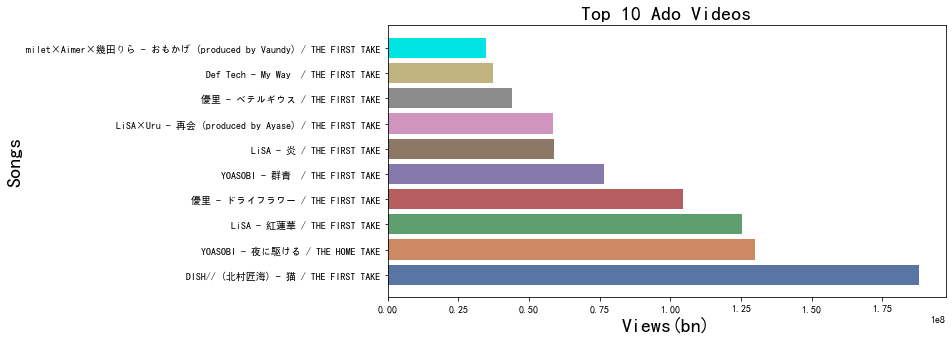

In [54]:
fig = plt.figure(figsize=(10, 5)) 
color = ['#5975a4', '#cc8963', '#5f9e6e', '#b55e60', '#857aab', '#8d7866', '#d095bf', '#8c8c8c', '#c1b37f', '#00E3E3']
# creating the bar plot 
plt.barh(top10_videos['Title'], top10_videos['Views'], color=color)
plt.xlabel("Views(bn)",fontsize=20) 
plt.ylabel("Songs",fontsize=20) 
plt.title("Top 10 Ado Videos",fontsize=20)
plt.show()

## 加入月份

In [55]:
data_thefirsttake['Month'] = pd.to_datetime(data_thefirsttake['PublishedAt']).dt.strftime('%b')
data_thefirsttake

,Title,Description,PublishedAt,Language,Views,Likes,CommentCount,Image,Tags,Topic,...,Topic3,Topic4,Topic5,Topic6,Tags1,Tags2,Tags3,Tags4,Tags5,Month
0,森七菜 - スマイル / THE FIRST TAKE,「THE FIRST TAKE」は、一発撮りのパフォーマンスを鮮明に切り取るYouTubeチ...,2022-09-09,ja,1106317,46333,1669,https://i.ytimg.com/vi/lNDkODRoLvI/hqdefault.jpg,"[the first take, first take, ファーストテイク, ファステク, ...","[Music, Music_of_Asia, Pop_music]",...,Pop_music,None,None,None,the first take,first take,ファーストテイク,ファステク,一発撮り,Sep
1,Kep1er - Wing Wing / THE FIRST TAKE,「THE FIRST TAKE」は、一発撮りのパフォーマンスを鮮明に切り取るYouTubeチ...,2022-09-07,ja,1596473,80218,2700,https://i.ytimg.com/vi/NJd0-O-IkPY/hqdefault.jpg,"[the first take, first take, ファーストテイク, Tokyo s...","[Music, Music_of_Asia, Pop_music]",...,Pop_music,None,None,None,the first take,first take,ファーストテイク,Tokyo sounds,Kep1er,Sep
2,Kep1er - WA DA DA (Japanese ver.) / THE FIRST ...,第239回は、9人組グローバルガールズグループ・Kep1erが初登場。\n披露するのは全世界...,2022-09-06,ja,563213,17247,124,https://i.ytimg.com/vi/ZeMsSO6hpms/hqdefault.jpg,"[[, , , , ]]","[Music, Music_of_Asia, Pop_music]",...,Pop_music,None,None,None,"[, , , , ]",None,None,None,None,Sep
3,Avril Lavigne - Complicated / THE FIRST TAKE,THE FIRST TAKE is a YouTube Channel dedicated ...,2022-09-02,en,5183532,229049,8438,https://i.ytimg.com/vi/_P9zR5KaPsc/hqdefault.jpg,"[the first take, first take, ファーストテイク, ファステク, ...","[Country_music, Music, Pop_music, Rock_music]",...,Pop_music,Rock_music,None,None,the first take,first take,ファーストテイク,ファステク,一発撮り,Sep
4,Creepy Nuts - 堕天 / THE FIRST TAKE,第238回は、”日本三連覇のラッパー”R-指定と、”世界一のDJ”DJ松永による1MC1DJ...,2022-08-31,ja,354419,12138,110,https://i.ytimg.com/vi/q2jz1O4GLWQ/hqdefault.jpg,"[[, , , , ]]","[Hip_hop_music, Music]",...,None,None,None,None,"[, , , , ]",None,None,None,None,Aug
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
415,LiSA - 紅蓮華 / THE FIRST TAKE,「THE FIRST TAKE」は、アーティストの一発撮りのパフォーマンスをよりリアルに、鮮...,2019-12-06,ja,125393123,1345499,45489,https://i.ytimg.com/vi/MpYy6wwqxoo/hqdefault.jpg,"[the first take, first take, ファーストテイク, ファステク, ...","[Music, Music_of_Asia, Rock_music]",...,Rock_music,None,None,None,the first take,first take,ファーストテイク,ファステク,一発撮り,Dec
416,adieu - 天気 / THE FIRST TAKE,「THE FIRST TAKE」は、アーティストの一発撮りのパフォーマンスをよりリアルに、鮮...,2019-12-04,ja,1277183,13791,372,https://i.ytimg.com/vi/FT6Wf8EWYwA/hqdefault.jpg,"[the first take, first take, ファーストテイク, ファステク, ...","[Music, Music_of_Asia, Pop_music]",...,Pop_music,None,None,None,the first take,first take,ファーストテイク,ファステク,一発撮り,Dec
417,Cö shu Nie - asphyxia （piano ver.) / THE FIRST...,「THE FIRST TAKE」は、アーティストの一発撮りのパフォーマンスをよりリアルに、鮮...,2019-11-29,ja,5936425,164170,3680,https://i.ytimg.com/vi/eWPYxw_yqW4/hqdefault.jpg,"[the first take, first take, ファーストテイク, ファステク, ...","[Music, Music_of_Asia]",...,None,None,None,None,the first take,first take,ファーストテイク,ファステク,一発撮り,Nov
418,Rude-α - It's only love / THE FIRST TAKE,「THE FIRST TAKE」は、アーティストの一発撮りのパフォーマンスをよりリアルに、鮮...,2019-11-23,ja,2498200,44038,1453,https://i.ytimg.com/vi/qdPbnrqs5UQ/hqdefault.jpg,"[the first take, first take, ファーストテイク, ファステク, ...","[Music, Music_of_Asia, Pop_music]",...,Pop_music,None,None,None,the first take,first take,ファーストテイク,ファステク,一発撮り,Nov


## 顯示月份上傳影片數量及排序

In [56]:
videos_per_month = data_thefirsttake.groupby('Month', as_index=False).size()
videos_per_month

,Month,size
0,Apr,35
1,Aug,38
2,Dec,38
3,Feb,34
4,Jan,34
5,Jul,34
6,Jun,43
7,Mar,39
8,May,35
9,Nov,34


In [57]:
sort_order = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun',
              'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

In [58]:
videos_per_month.index = pd.CategoricalIndex(videos_per_month['Month'], categories = sort_order, ordered=True)
videos_per_month = videos_per_month.sort_index()
videos_per_month

,Month,size
Month,,
Jan,Jan,34
Feb,Feb,34
Mar,Mar,39
Apr,Apr,35
May,May,35
Jun,Jun,43
Jul,Jul,34
Aug,Aug,38
Sep,Sep,29


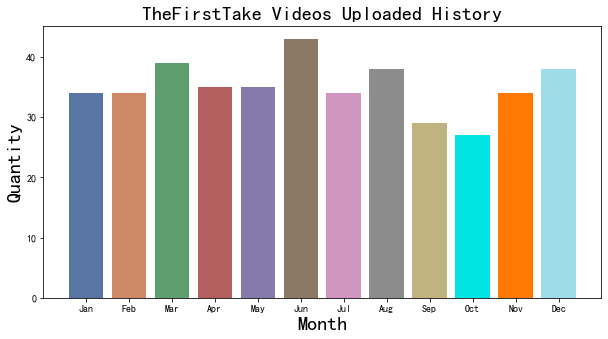

In [59]:
fig = plt.figure(figsize=(10, 5)) 
color = ['#5975a4', '#cc8963', '#5f9e6e', '#b55e60', '#857aab', '#8d7866', '#d095bf', '#8c8c8c', '#c1b37f', '#00E3E3', '#ff7801','#9edcea']
# creating the bar plot 
plt.bar(videos_per_month['Month'], videos_per_month['size'], color=color) 
  
plt.xlabel("Month",fontsize=20) 
plt.ylabel("Quantity",fontsize=20) 
plt.title("TheFirstTake Videos Uploaded History",fontsize=20)
plt.show()